<a href="https://colab.research.google.com/github/VinnyRosa/Alura-Challenge-DS/blob/main/Projeto_Alura_Challenge_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados(Challenge Alura semana 2)

(em construção) nessa etapa, o dataset tratado da semana anterior será importado e utilizado para que sejam realizadas as análises e visualizações afim de que sejam levantadas as informações chave que relatem possíveis causas do churn rate estar elevado

In [ ]:
# código de importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# importando os dados tratados da base
dataset = pd.read_json('Dataset_Challenge')
dataset

,IDcliente,Evasao,Genero,Senioridade,Parceiro,Depedentes,Permanencia,Serviço_Movel,Multiplas_Linhas,Serviço_Internet,...,Backup_Online,Proteção_Dispositivo,Suporte_Tecnico,TV_a_Cabo,Serviço_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Tarifa_mensal,Tarifa_Total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Não,Anual,Sim,Boleto bancário,65.60,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Não,Sim,Mensal,Não,Boleto bancário,59.90,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra óptica,...,Não,Sim,Não,Não,Não,Mensal,Sim,Pagamento Virtual,73.90,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Pagamento Virtual,98.00,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Não,Sim,Sim,Não,Mensal,Sim,Boleto bancário,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,Não,Feminino,Não,Não,Não,13,Sim,Não,DSL,...,Não,Não,Sim,Não,Não,Anual,Não,Boleto bancário,55.15,742.90
7028,9992-RRAMN,Sim,Masculino,Não,Sim,Não,22,Sim,Sim,Fibra óptica,...,Não,Não,Não,Não,Sim,Mensal,Sim,Pagamento Virtual,85.10,1873.70
7029,9992-UJOEL,Não,Masculino,Não,Não,Não,2,Sim,Não,DSL,...,Sim,Não,Não,Não,Não,Mensal,Sim,Boleto bancário,50.30,92.75
7030,9993-LHIEB,Não,Masculino,Não,Sim,Sim,67,Sim,Não,DSL,...,Não,Sim,Sim,Não,Sim,Bianual,Não,Boleto bancário,67.85,4627.65


In [ ]:
dataset.describe()

,Permanencia,Tarifa_mensal,Tarifa_Total
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
dataset.query('Evasao=="Yes"')

,IDcliente,Evasao,Genero,Senioridade,Parceiro,Depedentes,Permanencia,Serviço_Movel,Multiplas_Linhas,Serviço_Internet,...,Backup_Online,Proteção_Dispositivo,Suporte_Tecnico,TV_a_Cabo,Serviço_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Tarifa_mensal,Tarifa_Total


In [ ]:
dataset.query('Evasao=="No"')

,IDcliente,Evasao,Genero,Senioridade,Parceiro,Depedentes,Permanencia,Serviço_Movel,Multiplas_Linhas,Serviço_Internet,...,Backup_Online,Proteção_Dispositivo,Suporte_Tecnico,TV_a_Cabo,Serviço_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Tarifa_mensal,Tarifa_Total


In [ ]:
# realizar talvez um teste de hipotese para verificar a consistencia da distribuição dos dados
from scipy.stats import chisquare

In [ ]:
dataset['Evasao'].describe()

count     7032
unique       2
top        Não
freq      5163
Name: Evasao, dtype: object

In [ ]:
dataset.describe(include='all')

,IDcliente,Evasao,Genero,Senioridade,Parceiro,Depedentes,Permanencia,Serviço_Movel,Multiplas_Linhas,Serviço_Internet,...,Backup_Online,Proteção_Dispositivo,Suporte_Tecnico,TV_a_Cabo,Serviço_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Tarifa_mensal,Tarifa_Total
count,7032,7032,7032,7032,7032,7032,7032.000000,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000
unique,7032,2,2,2,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,NaN
top,0002-ORFBO,Não,Masculino,Não,Não,Não,NaN,Sim,Não,Fibra óptica,...,Não,Não,Não,Não,Não,Mensal,Sim,Pagamento Virtual,NaN,NaN
freq,1,5163,3549,5890,3639,4933,NaN,6352,3385,3096,...,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,32.421786,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441
std,NaN,NaN,NaN,NaN,NaN,NaN,24.545260,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000
50%,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000
75%,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500


tentando compreender como os gráficos funcionam

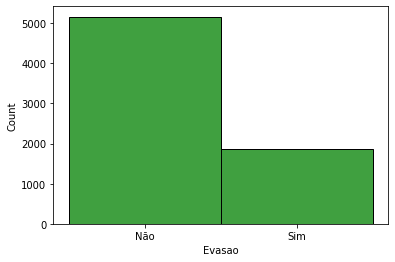

In [ ]:
sns.histplot(x='Evasao', data=dataset, color='g')

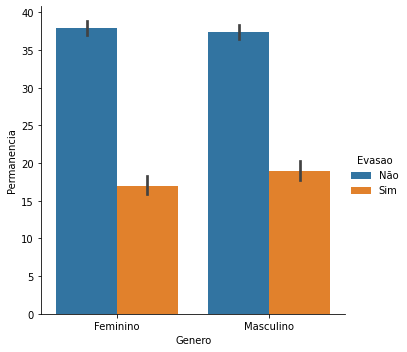

In [ ]:
# criar um padrão pra aplicar um for e gerar várias visualizações para concatenar
# e criar uma visão de perspectiva em relação ao churn
sns.catplot(x="Genero", y="Permanencia", hue="Evasao", kind="bar", data=dataset)

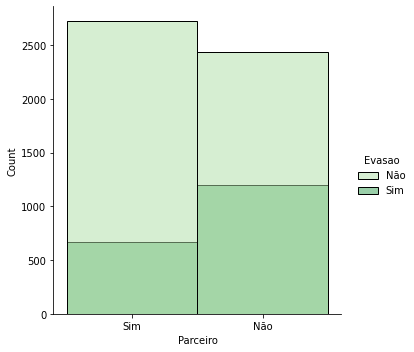

In [ ]:
sns.displot(data=dataset, x='Parceiro', hue='Evasao', kind='hist', palette='Greens')

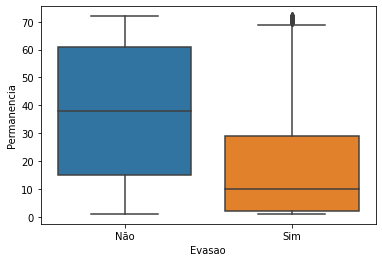

In [ ]:
sns.boxplot(x='Evasao', y='Permanencia', data=dataset)

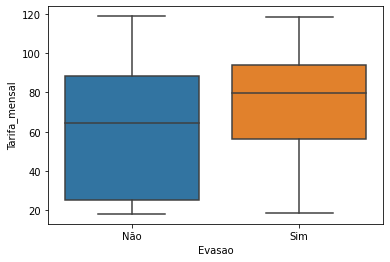

In [ ]:
sns.boxplot(x='Evasao', y='Tarifa_mensal', data=dataset)

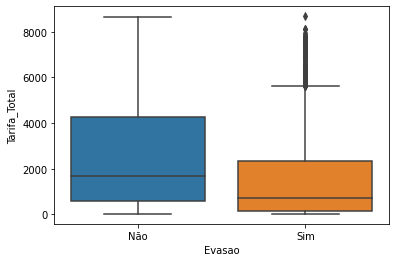

In [ ]:
sns.boxplot(x='Evasao', y='Tarifa_Total', data=dataset) # investigar esses pontos fora da curva do churn yes

pensando em como trabalhar os dados pra gerar as visualizações que quero

In [ ]:
# fazer um for pra contar os valores discretos do dataset pra somar e plotar o gráfico
# escrever na barra do gráfico no formato "'variável': 'valor'"
#for carro, valor in zip(carros, valores):
#  print(carro, valor)

#  dados_grafico += {key:value}

dataset['Evasao'].value_counts()

Não    5163
Sim    1869
Name: Evasao, dtype: int64

In [ ]:
dataset.head()

,IDcliente,Evasao,Genero,Senioridade,Parceiro,Depedentes,Permanencia,Serviço_Movel,Multiplas_Linhas,Serviço_Internet,...,Backup_Online,Proteção_Dispositivo,Suporte_Tecnico,TV_a_Cabo,Serviço_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Tarifa_mensal,Tarifa_Total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Não,Anual,Sim,Boleto bancário,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Não,Sim,Mensal,Não,Boleto bancário,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra óptica,...,Não,Sim,Não,Não,Não,Mensal,Sim,Pagamento Virtual,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Pagamento Virtual,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Não,Sim,Sim,Não,Mensal,Sim,Boleto bancário,83.9,267.40


In [ ]:
#soma = dataset[coluna].astype(dtype='category')
#dfsoma = pd.DataFrame(soma)
#type(dfsoma)
dataset.columns

Index(['IDcliente', 'Evasao', 'Genero', 'Senioridade', 'Parceiro',
       'Depedentes', 'Permanencia', 'Serviço_Movel', 'Multiplas_Linhas',
       'Serviço_Internet', 'Segurança_Online', 'Backup_Online',
       'Proteção_Dispositivo', 'Suporte_Tecnico', 'TV_a_Cabo',
       'Serviço_Filmes', 'Contrato', 'Fatura_Digital', 'Metodo_Pagamento',
       'Tarifa_mensal', 'Tarifa_Total'],
      dtype='object')

In [ ]:
# colunas = dataset.columns
# colunas[0]
colunas = [
    'Evasao', 'Genero', 'Senioridade', 'Parceiro',
    'Depedentes', 'Serviço_Movel', 'Multiplas_Linhas',
    'Serviço_Internet', 'Segurança_Online', 'Backup_Online',
    'Proteção_Dispositivo', 'Suporte_Tecnico', 'TV_a_Cabo',
    'Serviço_Filmes', 'Contrato', 'Fatura_Digital', 'Metodo_Pagamento',
]

dataset_grafico = dataset[colunas].astype(dtype='category')
dataset_grafico.head()
# existe a possibilidade do seniorcitizen bugar pois ele está como tipo categorico, mesmo numérico

,Evasao,Genero,Senioridade,Parceiro,Depedentes,Serviço_Movel,Multiplas_Linhas,Serviço_Internet,Segurança_Online,Backup_Online,Proteção_Dispositivo,Suporte_Tecnico,TV_a_Cabo,Serviço_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento
0,Não,Feminino,Não,Sim,Sim,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Boleto bancário
1,Não,Masculino,Não,Não,Não,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Boleto bancário
2,Sim,Masculino,Não,Não,Não,Sim,Não,Fibra óptica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Pagamento Virtual
3,Sim,Masculino,Sim,Sim,Não,Sim,Não,Fibra óptica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Pagamento Virtual
4,Sim,Feminino,Sim,Sim,Não,Sim,Não,Fibra óptica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Boleto bancário


estou trabalhando agora nessa parte abaixo. não sei se ficarei com alguma visualização dos dados acima

In [ ]:
# dataset_grafico['Churn'].unique() -> ['No', 'Yes']
# gender -> ['Feminino', 'Masculino]              
# SeniorCitizen       
# Partner             
# Dependents          
# PhoneService
# PaperlessBilling
# os de cima são todos iguais ao churn
# dataset_grafico['InternetService'].unique() -> ['DSL', 'Fiber optic', 'No']
# dataset_grafico['MultipleLines'].unique() -> ['No', 'Yes', 'No phone service']
# dataset_grafico['OnlineSecurity'].unique() -> ['No', 'Yes', 'No internet service']
# OnlineBackup        
# DeviceProtection    
# TechSupport         
# StreamingTV         
# StreamingMovies
# os de cima são todos iguais ao OnlineSecurity
# dataset_grafico['Contract'].unique() -> ['One year', 'Month-to-month', 'Two year']
# dataset_grafico['PaymentMethod'].unique() -> ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']
transformar = {
    'Não': 0,
    'Sim': 1,
    'Feminino': 0,
    'Masculino': 1,
    'DSL': 1,
    'Fibra óptica': 2,
    'Anual': 0,
    'Mensal': 1,
    'Bianual': 2,
    'Boleto bancário': 0,
    'Pagamento Virtual': 1,
    'débito automático(crédito)': 2,
    'débito automático': 3
}
data_teste = pd.DataFrame(columns=colunas)
for coluna in colunas:
    data_teste[coluna] = dataset_grafico[coluna].map(transformar, na_action='ignore')
data_teste.head()
#variaveis categóricas transformadas para numeros, com o objetivo de utilizar esses valores para modelar gráficos

,Evasao,Genero,Senioridade,Parceiro,Depedentes,Serviço_Movel,Multiplas_Linhas,Serviço_Internet,Segurança_Online,Backup_Online,Proteção_Dispositivo,Suporte_Tecnico,TV_a_Cabo,Serviço_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento
0,0,0,0,1,1,1,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0
1,0,1,0,0,0,1,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
2,1,1,0,0,0,1,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1
3,1,1,1,1,0,1,0.0,2,0.0,1.0,1.0,0.0,1.0,1.0,1,1,1
4,1,0,1,1,0,1,0.0,2,0.0,0.0,0.0,1.0,1.0,0.0,1,1,0


In [ ]:
#gerando as informações para o gráfico

categorias = ['Sim', 'Não', 'Feminino', 'Masculino']
categorias_2 = ['DSL', 'Fibra óptica', 'Anual', 'Mensal', 'Bianual']


# eu tenho que criar um comando for pra iterar no dataframe e trazer as somas, jogar no dicionário e formar ele

In [ ]:
dataset_grafico.nunique()

Evasao                  2
Genero                  2
Senioridade             2
Parceiro                2
Depedentes              2
Serviço_Movel           2
Multiplas_Linhas        3
Serviço_Internet        3
Segurança_Online        3
Backup_Online           3
Proteção_Dispositivo    3
Suporte_Tecnico         3
TV_a_Cabo               3
Serviço_Filmes          3
Contrato                3
Fatura_Digital          2
Metodo_Pagamento        4
dtype: int64

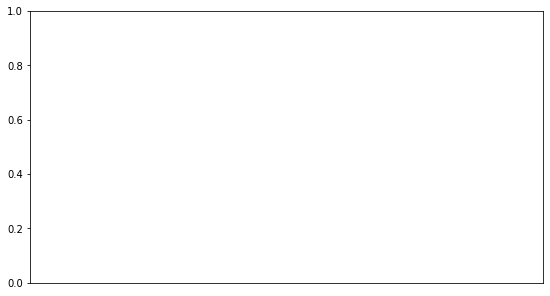

In [ ]:
fig, ax = plt.subplots(figsize=(9.2, 5))
ax.xaxis.set_visible(False)